##Assignment on preprocessing


###1. Load the dataset into python environment

###2. Make ‘PassengerId’ as the index column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###3. Check the basic details of the dataset

In [3]:
data.shape

(891, 11)

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

###4. Fill in all the missing values present in all the columns in the dataset

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [8]:
data = data.drop('Cabin',axis=1)

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

###5. Check and handle outliers in at least 3 columns in the dataset

####Age column

Text(0.5, 1.0, 'Boxplot of Age')

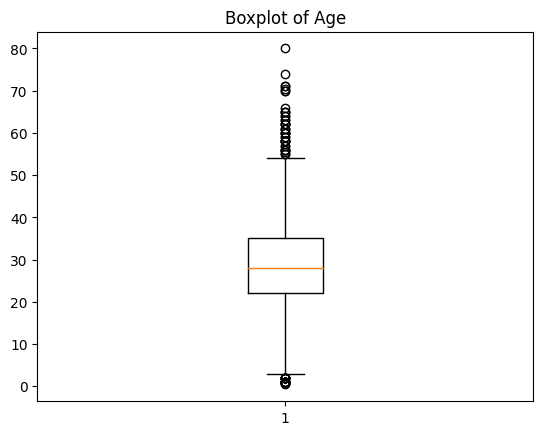

In [13]:
plt.boxplot(data["Age"])
plt.title("Boxplot of Age")

In [14]:
Q1 = np.percentile(data['Age'],25)

In [15]:
Q1

22.0

In [16]:
Q2 = np.percentile(data['Age'],50)

In [17]:
Q2

28.0

In [18]:
Q3 = np.percentile(data['Age'],75)

In [19]:
Q3

35.0

In [20]:
IQR = Q3-Q1

In [21]:
IQR

13.0

In [22]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [23]:
outliers=[]
for x in data['Age']:
  if x>upr_limit or x<low_limit:
    outliers.append(x)

In [26]:
ind = data[(data['Age']>upr_limit)|(data['Age']<low_limit)].index

In [27]:
data.drop(ind,inplace=True)

####Fare column

Text(0.5, 1.0, 'Boxplot of Fare')

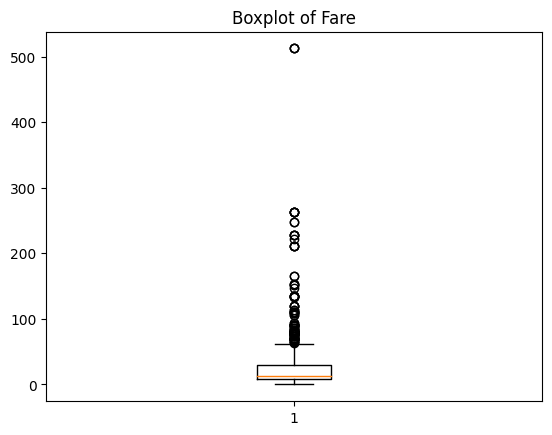

In [29]:
plt.boxplot(data["Fare"])
plt.title("Boxplot of Fare")

In [30]:
Q1 = np.percentile(data['Fare'],25)

In [31]:
Q1

7.8958

In [32]:
Q2 = np.percentile(data['Fare'],50)

In [33]:
Q2

13.4167

In [34]:
Q3 = np.percentile(data['Fare'],75)

In [35]:
IQR = Q3 - Q1

In [36]:
IQR

22.174999999999997

In [37]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [38]:
low_limit

-25.366699999999994

In [39]:
upr_limit

63.333299999999994

In [41]:
outliers=[]
for x in data['Fare']:
  if x>upr_limit or x<low_limit:
    outliers.append(x)

In [42]:
ind = data[(data['Fare']>upr_limit)|(data['Fare']<low_limit)].index

In [43]:
data.drop(ind,inplace=True)

####SibSp column

Text(0.5, 1.0, 'Boxplot of SibSp')

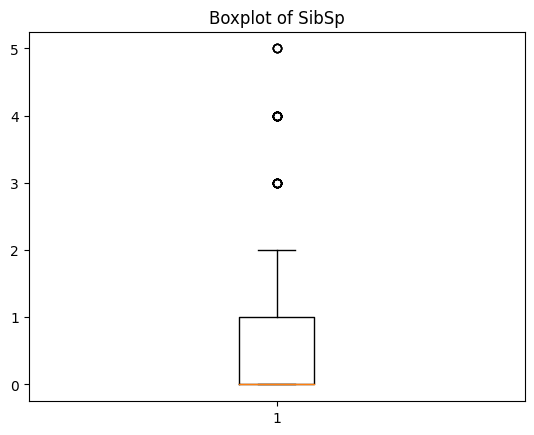

In [45]:
plt.boxplot(data["SibSp"])
plt.title("Boxplot of SibSp")

In [46]:
Q1 = np.percentile(data['SibSp'],25)

In [47]:
Q1

0.0

In [48]:
Q2 = np.percentile(data['SibSp'],50)

In [49]:
Q2

0.0

In [50]:
Q3 = np.percentile(data['SibSp'],75)

In [51]:
Q3

1.0

In [52]:
IQR = Q3 - Q1

In [53]:
IQR

1.0

In [54]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [55]:
low_limit

-1.5

In [56]:
upr_limit

2.5

In [57]:
outliers=[]
for x in data['SibSp']:
  if x>upr_limit or x<low_limit:
    outliers.append(x)

In [58]:
ind = data[(data['SibSp']>upr_limit)|(data['SibSp']<low_limit)].index

In [59]:
data.drop(ind,inplace=True)

###6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  689 non-null    int64  
 1   Pclass    689 non-null    int64  
 2   Name      689 non-null    object 
 3   Sex       689 non-null    object 
 4   Age       689 non-null    float64
 5   SibSp     689 non-null    int64  
 6   Parch     689 non-null    int64  
 7   Ticket    689 non-null    object 
 8   Fare      689 non-null    float64
 9   Embarked  689 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 59.2+ KB


In [63]:
x = data.drop(["Survived","Name","Sex","Ticket","Embarked"], axis=1)

In [64]:
x

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [65]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [67]:
x = pd.DataFrame(x)

In [68]:
x.columns = ["Pclass","Age","SibSp","Parch","Fare"]

In [69]:
x

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.372549,0.5,0.000000,0.118118
1,1.0,0.450980,0.0,0.000000,0.129115
2,0.0,0.627451,0.5,0.000000,0.865114
3,1.0,0.627451,0.0,0.000000,0.131152
4,1.0,0.490196,0.0,0.000000,0.137804
...,...,...,...,...,...
684,0.5,0.470588,0.0,0.000000,0.211798
685,0.0,0.313725,0.0,0.000000,0.488765
686,1.0,0.490196,0.5,0.333333,0.382051
687,0.0,0.450980,0.0,0.000000,0.488765


In [70]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.00000,689.000000,689.000000
mean,0.746734,0.504141,0.13643,0.044993,0.270959
std,0.361793,0.187161,0.25051,0.125771,0.213306
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962
50%,1.000000,0.490196,0.00000,0.000000,0.171068
75%,1.000000,0.588235,0.00000,0.000000,0.382051
max,1.000000,1.000000,1.00000,1.000000,1.000000
